In [1]:
import xarray as xr
import numpy as np
import easygems.healpix as egh

In [2]:
ds9 = xr.open_zarr("/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT1H.z9.zarr/")

In [3]:
ds8 = xr.open_zarr("/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT1H.z8.zarr/")

In [4]:
ds9 = egh.attach_coords(ds9)
ds8 = egh.attach_coords(ds8)

In [5]:
from scipy.interpolate import NearestNDInterpolator 

lon_points = ds9["lon"].values
lat_points = ds9["lat"].values

lon = ds8.lon
lat = ds8.lat
#lon2, lat2 = np.meshgrid(lon, lat)

points = np.stack((lon_points, lat_points), axis=1)

In [6]:
interp_fn = NearestNDInterpolator(points, ds9.sftlf)

In [7]:
lsm_interp = interp_fn(np.stack((lon, lat), axis=1))

In [8]:
lsm_da = xr.DataArray(lsm_interp,coords={"cell":ds8.cell})

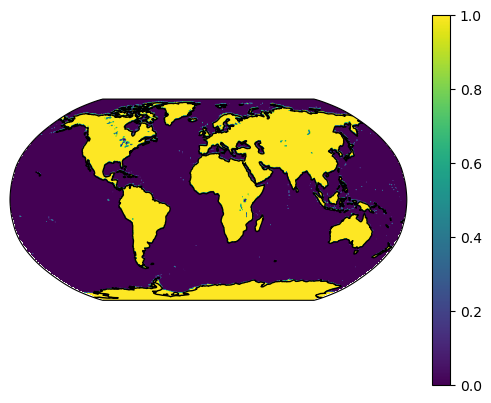

In [9]:
#Plot the healpix grid land sea mask
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ax=plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.set_global()
im = egh.healpix_show(lsm_da,ax=ax)
ax.coastlines()
plt.colorbar(im)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/indexing.py:1620: PerformanceWarning: Slicing with an out-of-order index is generating 156 times more chunks
  return self.array[key]


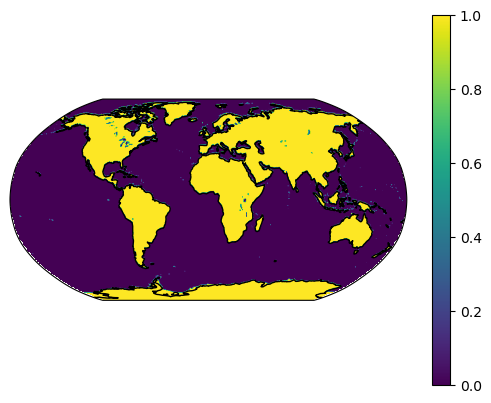

In [10]:
#Plot the healpix grid land sea mask
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ax=plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.set_global()
im = egh.healpix_show(ds9.sftlf,ax=ax)
ax.coastlines()
plt.colorbar(im)

In [13]:
xr.Dataset({"sftlf":lsm_da}).to_zarr("/g/data/nf33/hk25_AusNode_coastal/sftlf_um_z8.zarr")

In [15]:
xr.open_zarr("/g/data/nf33/hk25_AusNode_coastal/icon_angles_z8.zarr/")

<xarray.Dataset> Size: 47MB
Dimensions:          (cell: 786432)
Coordinates:
  * cell             (cell) int64 6MB 0 1 2 3 4 ... 786428 786429 786430 786431
    crs              int64 8B ...
    lat              (cell) float64 6MB dask.array<chunksize=(49152,), meta=np.ndarray>
    lon              (cell) float64 6MB dask.array<chunksize=(49152,), meta=np.ndarray>
Data variables:
    angle            (cell) float32 3MB dask.array<chunksize=(786432,), meta=np.ndarray>
    angle_interp     (cell) float64 6MB dask.array<chunksize=(49152,), meta=np.ndarray>
    coast            (cell) int64 6MB dask.array<chunksize=(49152,), meta=np.ndarray>
    min_coast_dist   (cell) float32 3MB dask.array<chunksize=(786432,), meta=np.ndarray>
    variance         (cell) float32 3MB dask.array<chunksize=(786432,), meta=np.ndarray>
    variance_interp  (cell) float64 6MB dask.array<chunksize=(49152,), meta=np.ndarray>
Attributes:
    R_km:               100
    acknowledgmements:  This method was developed with help from Ewan Short a...
    description:        Dataset of coastline angles and variance